# Convert OBJ file to PNG
To produce images of wind turbines for visual impact assessment, the program loads .obj files and converts them into .png files. This conversion involves utilizing the view angle and wind direction to appropriately rotate the object file in the desired orientation.

In [1]:
import os
from pathlib import Path
import sys
sys.path.append(str(Path(os.getcwd()).parent.parent))
from src.utils import print_code, load_and_normalize_obj, plot_trisurface, crop_image, adjust_image, plot_trisurface
from IPython.core.display import HTML

Initially, the program loads vertices and faces from the .obj file and normalizes them based on the total height of the wind turbine.

In [2]:
HTML(print_code(load_and_normalize_obj))

The vertices are represented by points in 3D space, while the faces are defined by the indices of the vertices that form the face.

In [10]:
V, F = load_and_normalize_obj("../../assets/turbine.obj", total_height = 1)
print("V: ",V,"\n\nF: ", F)

V:  [[-0.38323411 -0.04002556  0.67077201]
 [-0.38322772 -0.03992025  0.67064993]
 [-0.38322314 -0.04018633  0.67075629]
 ...
 [ 0.19505491 -0.03958282  0.99919489]
 [ 0.19505738 -0.03963892  0.99921006]
 [ 0.1950604  -0.03974164  0.99916952]] 

F:  [[475 444 471]
 [477 492 471]
 [475 471 492]
 ...
 [388 583 348]
 [532 583 388]
 [466 532 388]]


Following that, the vertices and faces are loaded into `matplotlib`, and a 3D plot is created using `plt.plot_trisurf`. The background of the 3D plot is set to transparent and the image is thereafter saved as a .png file.

In [4]:
HTML(print_code(plot_trisurface))

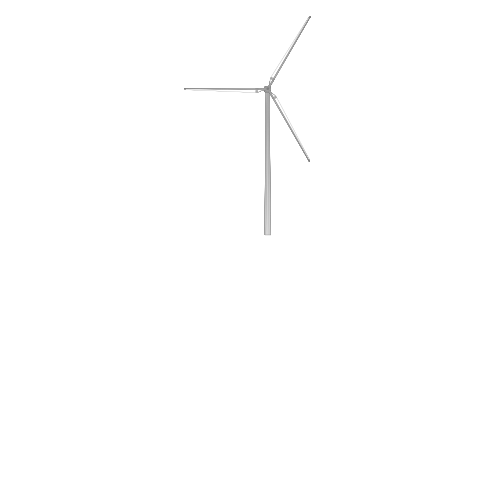

In [5]:
plot_trisurface("../../assets/turbine.obj", azimuth=-90)    

The image needs to be cropped to remove the axis from the plot. This is done be removing the 5 border pixels of the image.

In [6]:
HTML(print_code(crop_image))

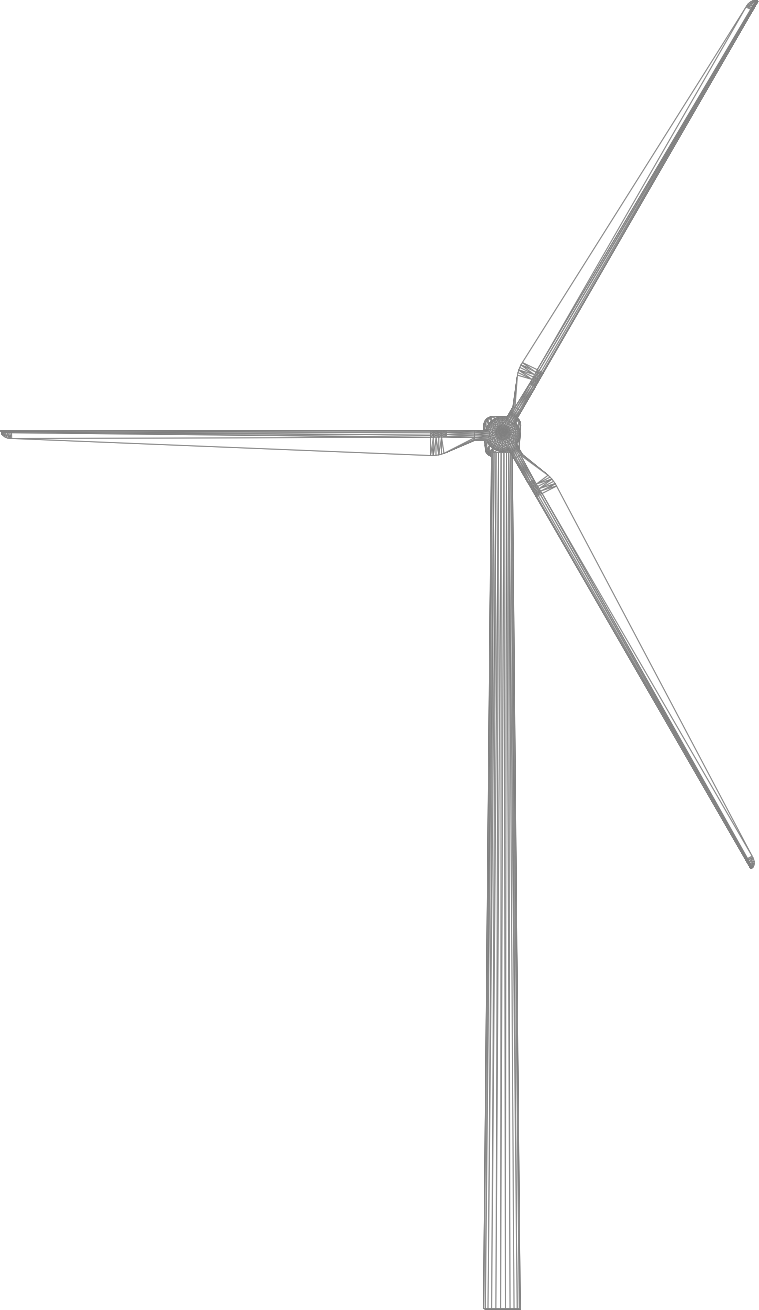

In [9]:
pil_image = crop_image("../../temp/obj2png.png")

Lastly, the image needs to be adjusted according to the weather conditions of the Google Street View image.

In [ ]:
HTML(print_code(adjust_image))

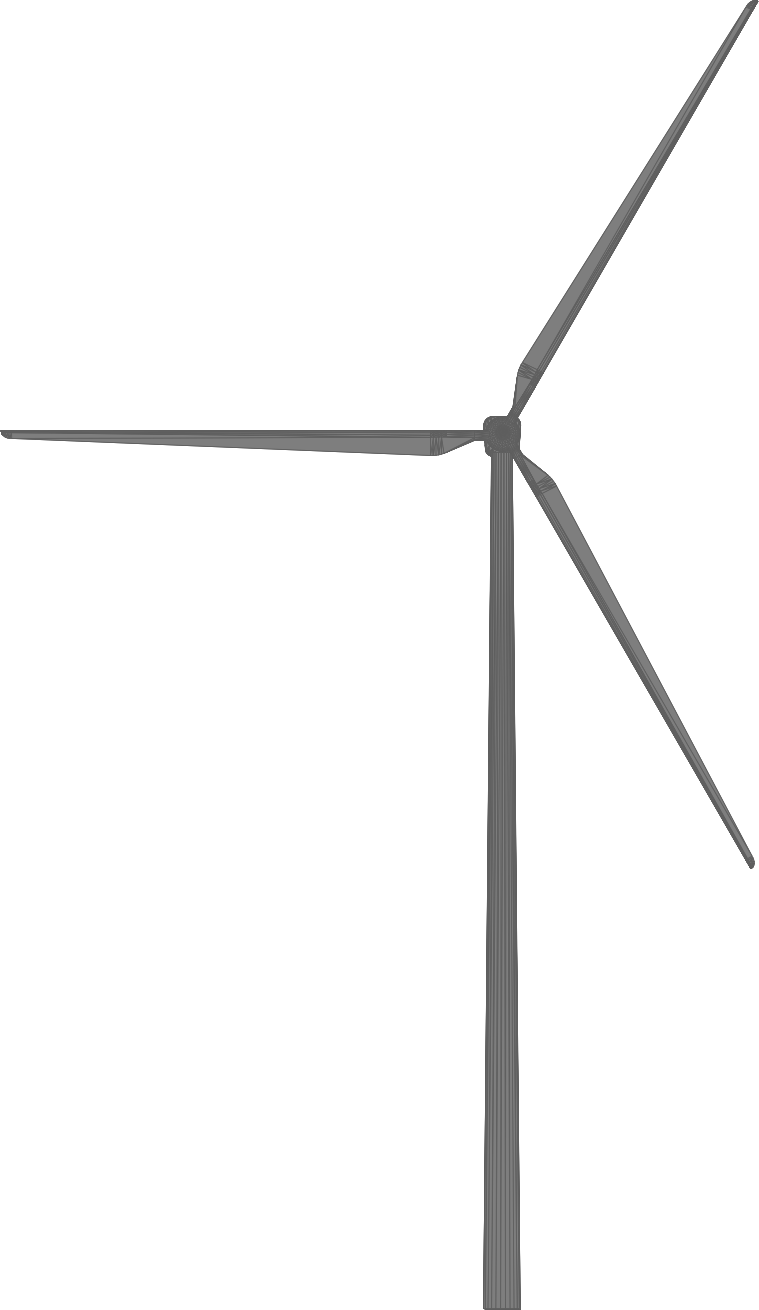

In [13]:
image = adjust_image("../../temp/obj2png.png", brightness = 0.5, contrast = 0.5)

Currently, the program applies a fixed 50% reduction in contrast and brightness, as weather data hasn't been integrated. This configuration is subject to adjustment in future iterations.